In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
#dataset
df = pd.read_csv('out-attack.csv')
df

,time,router,outport,inport,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
0,11,0,East,Local,0,3,1,4,0,0,31,15,7
1,15,1,East,West,0,3,1,4,0,0,31,15,7
2,19,2,East,West,0,3,1,4,0,0,31,15,7
3,22,0,East,Local,0,3,1,5,0,0,31,15,18
4,23,3,North,West,0,3,1,4,0,0,31,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,9918,2,East,West,3,1,2,9,0,0,31,15,9902
16499,9918,7,North,South,3,1,2,8,0,0,31,15,9895
16500,9918,11,North,South,0,3,1,4,0,0,31,15,9894
16501,9918,3,North,West,4,2,2,8,0,0,31,15,9895


In [31]:
df.dtypes

time           int64
router         int64
outport       object
inport        object
flit_id        int64
flit_type      int64
vnet           int64
vc             int64
src_ni         int64
src_router     int64
dst_ni         int64
dst_router     int64
enq_time       int64
dtype: object

In [32]:
df.shape

(16503, 13)

In [33]:
df.describe()

,time,router,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
count,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.0,16503.0,16503.0,16503.0,16503.000000
mean,5048.322063,5.561716,1.438042,1.561595,1.574805,6.757559,0.0,0.0,31.0,15.0,5030.141489
std,2885.499495,5.230993,1.498604,1.046754,0.730145,3.075830,0.0,0.0,0.0,0.0,2885.516007
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,31.0,15.0,7.000000
25%,2469.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.0,0.0,31.0,15.0,2448.000000
50%,4928.000000,3.000000,1.000000,1.000000,2.000000,8.000000,0.0,0.0,31.0,15.0,4914.000000
75%,7598.000000,11.000000,3.000000,3.000000,2.000000,8.000000,0.0,0.0,31.0,15.0,7580.000000
max,9918.000000,15.000000,4.000000,3.000000,2.000000,11.000000,0.0,0.0,31.0,15.0,9907.000000


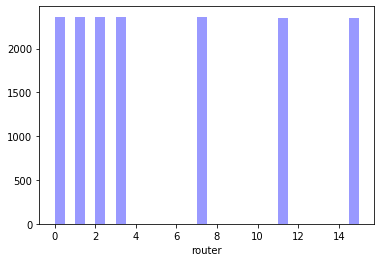

In [34]:
sns.distplot(df['router'], kde = False, bins=30, color='blue')

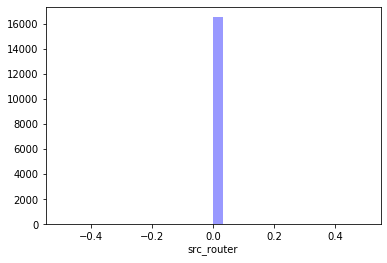

In [35]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

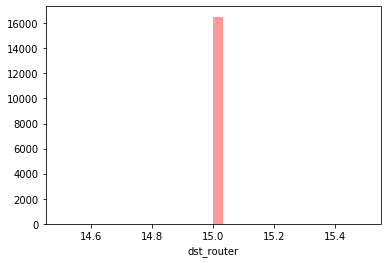

In [36]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

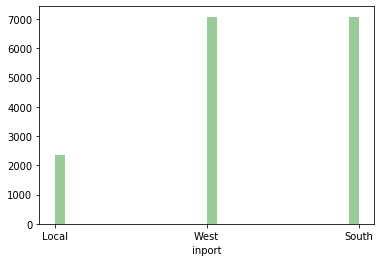

In [37]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

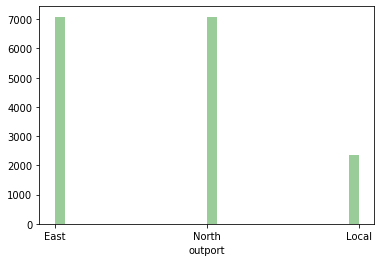

In [38]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

In [39]:
direction = {'Local': 0,'North': 1, 'East': 2, 'South':3,'West':4}
df = df.replace({'inport': direction, 'outport': direction})

In [40]:
df['flit_id'] = df['flit_id']+1
df['flit_type'] = df['flit_type']+1
df['vnet'] = df['vnet']+1
df['vc'] = df['vc']+1

In [41]:
df.dtypes

time           int64
router         int64
outport       object
inport         int64
flit_id        int64
flit_type      int64
vnet           int64
vc             int64
src_ni         int64
src_router     int64
dst_ni         int64
dst_router     int64
enq_time       int64
dtype: object

In [42]:
df['outport'] = df['outport'].astype(str).astype(int)

In [43]:
hoparr = {"0to0":0,"0to1":1,"0to2":2,"0to3":3,"0to4":1,"0to5":2,"0to6":3,"0to7":4,"0to8":2,"0to9":3,"0to10":4,"0to11":5,"0to12":3,"0to13":4,"0to14":5,"0to15":6,
         "1to1":0,"1to2":1,"1to3":2,"1to4":2,"1to5":1,"1to6":2,"1to7":3,"1to8":3,"1to9":2,"1to10":3,"1to11":4,"1to12":5,"1to13":3,"1to14":4,"1to15":5,
         "2to2":0,"2to3":1,"2to4":3,"2to5":2,"2to6":1,"2to7":2,"2to8":4,"2to9":3,"2to10":2,"2to11":3,"2to12":5,"2to13":4,"2to14":3,"2to15":4,
         "3to3":0,"3to4":4,"3to5":3,"3to6":2,"3to7":1,"3to8":5,"3to9":4,"3to10":3,"3to11":2,"3to12":6,"3to13":5,"3to14":4,"3to15":3,
         "4to4":0,"4to5":1,"4to6":2,"4to7":3,"4to8":1,"4to9":2,"4to10":3,"4to11":4,"4to12":2,"4to13":3,"4to14":4,"4to15":5,
         "5to5":0,"5to6":1,"5to7":2,"5to8":2,"5to9":1,"5to10":2,"5to11":3,"5to12":3,"5to13":2,"5to14":3,"5to15":4,
         "6to6":0,"6to7":1,"6to8":3,"6to9":2,"6to10":1,"6to11":2,"6to12":4,"6to13":3,"6to14":2,"6to15":3,
         "7to7":0,"7to8":4,"7to9":3,"7to10":2,"7to11":1,"7to12":5,"7to13":4,"7to14":3,"7to15":2,
         "8to8":0,"8to9":1,"8to10":2,"8to11":3,"8to12":1,"8to13":2,"8to14":3,"8to15":4,
         "9to9":0,"9to10":1,"9to11":2,"9to12":2,"9to13":1,"9to14":2,"9to15":4,
         "10to10":0,"10to11":1,"10to12":3,"10to13":2,"10to14":1,"10to15":2,
         "11to11":0,"11to12":4,"11to13":3,"11to14":2,"11to15":1,
         "12to12":0,"12to13":1,"12to14":2,"12to15":3,
         "13to13":0,"13to14":1,"13to15":2,
         "14to14":0,"14to15":1,
         "15to15":0}

In [44]:
hopcurrentarr = []
hoptotarr = []
hoppercentarr =[]
waitingarr = []
interval = 500
count = 0
for index, row in df.iterrows():
    current_time = row["time"]
    enqueue_time = row["enq_time"]
    waiting_time = current_time - enqueue_time
    waitingarr.append(waiting_time)
    current_router = row["router"]
    src_router = row["src_router"]
    dst_router = row["dst_router"]
    src_router_temp = src_router
    if src_router_temp>dst_router:
        temph = src_router_temp
        src_router_temp = dst_router
        dst_router = temph
    hop_count_string = str(src_router_temp)+"to"+str(dst_router)
    src_router_temp = src_router
    hop_count = hoparr.get(hop_count_string)
    if src_router_temp>current_router:
        tempc = src_router_temp
        src_router_temp = current_router
        current_router = tempc
    current_hop_string = str(src_router_temp)+"to"+str(current_router)
    current_hop = hoparr.get(current_hop_string)
    if(current_hop == 0 and hop_count ==0):
        hop_percent = 0
    else:
        hop_percent = current_hop/hop_count
    hoptotarr.append(hop_count)
    hopcurrentarr.append(current_hop)
    hoppercentarr.append(hop_percent)

In [45]:
print(len(hoptotarr))

16503


In [46]:
print(len(hopcurrentarr))

16503


In [47]:
timearr = []
interval = 99
count = 0
for index, row in df.iterrows():
    if row["time"]<=interval:
        count+=1
    else:
        timearr.append([interval+1,count])
        count=1
        interval+=100
timearr.append([interval+1,count])

In [48]:
countarr = []
increarr = []
maxarr = []
for i in range(len(timearr)):
    for cnt in range(timearr[i][1],0,-1):
        countarr.append(cnt)
        maxarr.append(timearr[i][1])
        increment = timearr[i][1] - cnt + 1
        increarr.append(increment)
print(len(countarr))

16503


In [49]:
df=pd.get_dummies(df, prefix=['router'], columns=['router'])
df = df.assign(hop_count=hoptotarr)
df = df.assign(current_hop=hopcurrentarr)
df = df.assign(hop_percentage=hoppercentarr)
df = df.assign(enqueue_time=waitingarr)

In [50]:
df = df.assign(packet_count_decr=countarr)
df = df.assign(packet_count_incr=increarr)
df = df.assign(max_packet_count=maxarr)
df["packet_count_index"] = df["packet_count_decr"]*df["packet_count_incr"]
df["packet_max_index"] = df["packet_count_index"]*df["max_packet_count"]
df["port_index"] = df["outport"]*df["inport"]
df["flit_index"] = df["flit_id"]*df["flit_type"]
df["vnet_vc_index"] = df["vnet"]*df["vc"]

In [51]:
df.rename(columns={'time': 'timestamp'}, inplace=True)

In [52]:
df = df.drop(columns=['enq_time'])

In [53]:
df.isnull().sum()

timestamp             0
outport               0
inport                0
flit_id               0
flit_type             0
vnet                  0
vc                    0
src_ni                0
src_router            0
dst_ni                0
dst_router            0
router_0              0
router_1              0
router_2              0
router_3              0
router_7              0
router_11             0
router_15             0
hop_count             0
current_hop           0
hop_percentage        0
enqueue_time          0
packet_count_decr     0
packet_count_incr     0
max_packet_count      0
packet_count_index    0
packet_max_index      0
port_index            0
flit_index            0
vnet_vc_index         0
dtype: int64

In [54]:
df.dtypes

timestamp               int64
outport                 int32
inport                  int64
flit_id                 int64
flit_type               int64
vnet                    int64
vc                      int64
src_ni                  int64
src_router              int64
dst_ni                  int64
dst_router              int64
router_0                uint8
router_1                uint8
router_2                uint8
router_3                uint8
router_7                uint8
router_11               uint8
router_15               uint8
hop_count               int64
current_hop             int64
hop_percentage        float64
enqueue_time            int64
packet_count_decr       int64
packet_count_incr       int64
max_packet_count        int64
packet_count_index      int64
packet_max_index        int64
port_index              int64
flit_index              int64
vnet_vc_index           int64
dtype: object

In [55]:
df['target'] = 1

In [56]:
df.head(10)

,timestamp,outport,inport,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,...,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,flit_index,vnet_vc_index,target
0,11,2,0,1,4,2,5,0,0,31,...,4,164,1,164,164,26896,0,4,10,1
1,15,2,4,1,4,2,5,0,0,31,...,8,163,2,164,326,53464,8,4,10,1
2,19,2,4,1,4,2,5,0,0,31,...,12,162,3,164,486,79704,8,4,10,1
3,22,2,0,1,4,2,6,0,0,31,...,4,161,4,164,644,105616,0,4,12,1
4,23,1,4,1,4,2,5,0,0,31,...,16,160,5,164,800,131200,4,4,10,1
5,26,2,4,1,4,2,5,0,0,31,...,8,159,6,164,954,156456,8,4,10,1
6,27,1,3,1,4,2,5,0,0,31,...,20,158,7,164,1106,181384,3,4,10,1
7,30,2,4,1,4,2,5,0,0,31,...,12,157,8,164,1256,205984,8,4,10,1
8,31,1,3,1,4,2,5,0,0,31,...,24,156,9,164,1404,230256,3,4,10,1
9,34,1,4,1,4,2,5,0,0,31,...,16,155,10,164,1550,254200,4,4,10,1


In [57]:
df.to_csv('out-good.csv',index=False)